#**Avocado Price Prediction**

### **Introduction:**
The Avocado Project delves into the intricate dynamics of avocado retail sales in the United States, utilizing a comprehensive dataset spanning from 2015 to 2023. This dataset provides detailed weekly retail scan data, offering insights into average pricing, total volume sold, regional distribution, and variations between conventional and organic varieties. With Product Lookup (PLU) codes representing distinct avocado varieties, the project aims to unravel factors driving sales fluctuations, including seasonal trends, regional preferences, and pricing strategies. Through advanced analytical techniques and predictive modeling, the project seeks to provide actionable insights for industry stakeholders to optimize supply chain management and marketing strategies. By contributing to the understanding of avocado consumption patterns, this project not only enhances agricultural economics but also informs discussions on food sustainability and consumer behavior in the United States, ultimately benefiting producers, retailers, and consumers.







### **Aim:**
The aim of the Avocado Project is to analyze retail sales trends of avocados in the United States from 2015 to 2023. By examining factors such as pricing, volume sold, and regional distribution, the project seeks to uncover patterns influencing sales fluctuations. Through advanced analytics and predictive modeling, the project aims to provide actionable insights for stakeholders to optimize supply chain management and marketing strategies, fostering sustainability and growth in the avocado industry.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Avocado_HassAvocadoBoard_20152023v1.0.1.csv")
df

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.790000,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.760000,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.080000,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington
...,...,...,...,...,...,...,...,...,...,...,...,...
53410,2023-12-03,1.550513,5693.91,204.64,1211.25,0.00,4278.03,NaN,NaN,NaN,organic,Toledo
53411,2023-12-03,1.703920,343326.10,66808.44,132075.11,58.65,138830.45,NaN,NaN,NaN,organic,West
53412,2023-12-03,1.618931,34834.86,15182.42,1211.38,0.00,18075.66,NaN,NaN,NaN,organic,WestTexNewMexico
53413,2023-12-03,1.245406,2942.83,1058.54,7.46,0.00,1779.19,NaN,NaN,NaN,organic,Wichita


In [ ]:
df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


In [ ]:
df.tail()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
53410,2023-12-03,1.550513,5693.91,204.64,1211.25,0.00,4278.03,NaN,NaN,NaN,organic,Toledo
53411,2023-12-03,1.703920,343326.10,66808.44,132075.11,58.65,138830.45,NaN,NaN,NaN,organic,West
53412,2023-12-03,1.618931,34834.86,15182.42,1211.38,0.00,18075.66,NaN,NaN,NaN,organic,WestTexNewMexico
53413,2023-12-03,1.245406,2942.83,1058.54,7.46,0.00,1779.19,NaN,NaN,NaN,organic,Wichita
53414,2023-12-03,1.479240,2010020.72,271808.32,274480.64,63.43,1364514.02,NaN,NaN,NaN,organic,TotalUS


In [ ]:
df.columns

Index(['Date', 'AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'region'],
      dtype='object')

In [ ]:
print(f"Number of rows : {df.shape[0]}")
print(f"Number of columns : {df.shape[1]}")

Number of rows : 53415
Number of columns : 12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


In [ ]:
df.isnull().sum()

Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,53415.0,1.428910,3.931160e-01,0.44,1.119091,1.40,1.690,3.440830e+00
TotalVolume,53415.0,869447.441374,3.545274e+06,84.56,16264.655000,120352.46,454238.015,6.103446e+07
plu4046,53415.0,298270.749448,1.307669e+06,0.00,694.725000,14580.58,128792.380,2.544720e+07
plu4225,53415.0,222217.037654,9.554624e+05,0.00,2120.800000,17516.63,93515.600,2.047057e+07
plu4770,53415.0,20531.954686,1.040977e+05,0.00,0.000000,90.05,3599.735,2.860025e+06
TotalBags,53415.0,217508.289491,8.676947e+05,0.00,7846.520000,36953.10,111014.610,1.629830e+07
SmallBags,41025.0,103922.170677,5.692608e+05,0.00,0.000000,694.58,37952.980,1.256716e+07
LargeBags,41025.0,23313.164066,1.496622e+05,0.00,0.000000,0.00,2814.920,4.324231e+06
XLargeBags,41025.0,2731.811796,2.258910e+04,0.00,0.000000,0.00,0.000,6.795868e+05


In [ ]:
df.isnull().sum()/df.shape[0]*100

Date             0.000000
AveragePrice     0.000000
TotalVolume      0.000000
plu4046          0.000000
plu4225          0.000000
plu4770          0.000000
TotalBags        0.000000
SmallBags       23.195732
LargeBags       23.195732
XLargeBags      23.195732
type             0.000000
region           0.000000
dtype: float64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["type"].value_counts()


conventional    26709
organic         26706
Name: type, dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
year = df['Date'].dt.year.value_counts()
year

2018    6136
2019    6136
2020    6136
2021    6136
2022    6136
2023    5782
2017    5722
2016    5616
2015    5615
Name: Date, dtype: int64

In [ ]:
df["region"].value_counts()

Albany                  932
Sacramento              932
Northeast               932
Atlanta                 932
Orlando                 932
Philadelphia            932
PhoenixTucson           932
Pittsburgh              932
Plains                  932
Portland                932
RaleighGreensboro       932
RichmondNorfolk         932
Roanoke                 932
SanDiego                932
NewOrleans              932
SanFrancisco            932
Seattle                 932
SouthCarolina           932
SouthCentral            932
Southeast               932
Spokane                 932
StLouis                 932
Syracuse                932
Tampa                   932
TotalUS                 932
West                    932
NewYork                 932
NorthernNewEngland      932
Nashville               932
Detroit                 932
BaltimoreWashington     932
Boise                   932
Boston                  932
BuffaloRochester        932
California              932
Charlotte           


### **Exploratory Data Analysis (EDA)**

**Avocado Type Distribution Based on Total Volume**

In [ ]:
df['type'] = df['type'].astype('category')

In [ ]:
total_volume_by_type = df.groupby('type')['TotalVolume'].sum()

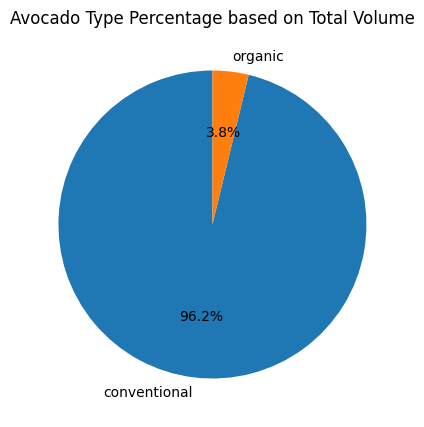

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(total_volume_by_type, labels=total_volume_by_type.index, autopct='%1.1f%%', startangle=90)
plt.title('Avocado Type Percentage based on Total Volume')
plt.show()


**Total Avocado Volume by Year**

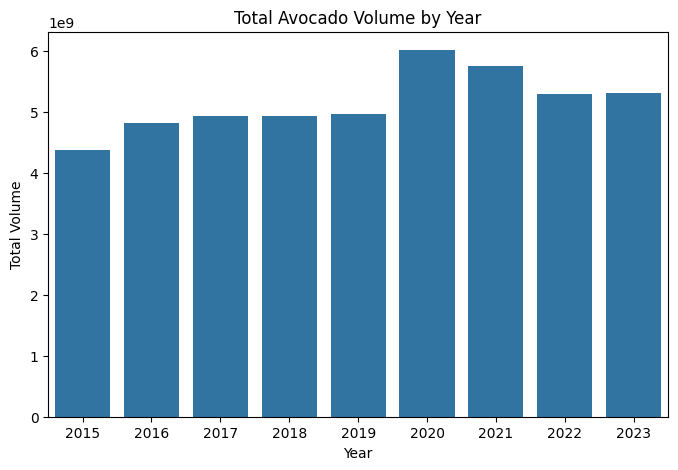

In [ ]:
df['Year'] = df['Date'].dt.year
total_volume_by_year = df.groupby('Year')['TotalVolume'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Year', y='TotalVolume', data=total_volume_by_year)
plt.title('Total Avocado Volume by Year')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()

**Total Avocado Volume by Region**

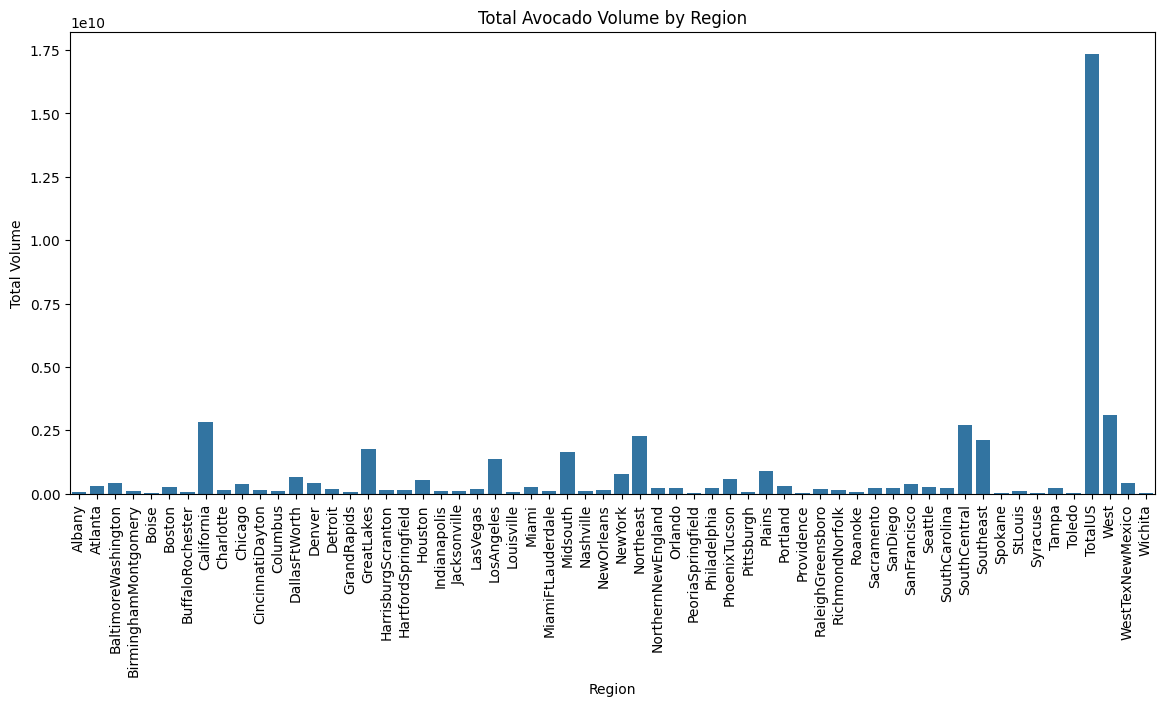

In [ ]:
df['region'] = df['region'].astype('category')

total_volume_by_region = df.groupby('region')['TotalVolume'].sum().reset_index()


plt.figure(figsize=(14, 6))
sns.barplot(x='region', y='TotalVolume', data=total_volume_by_region)
plt.title('Total Avocado Volume by Region')
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.xticks(rotation=90)  #
plt.show()

**Distribution of Numeric Columns**

<Figure size 500x400 with 0 Axes>

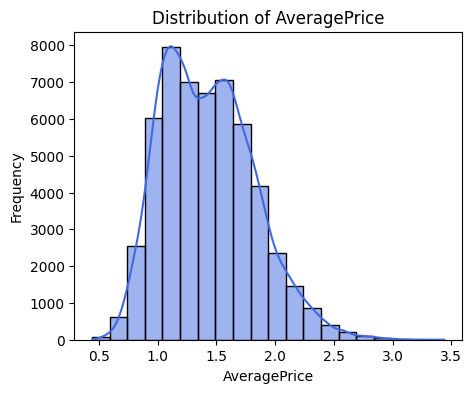

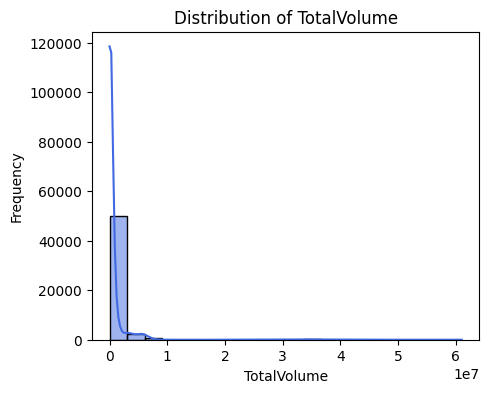

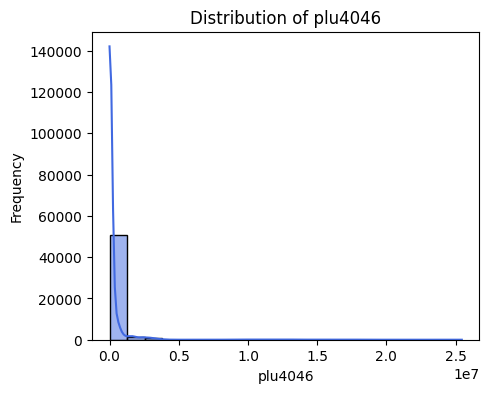

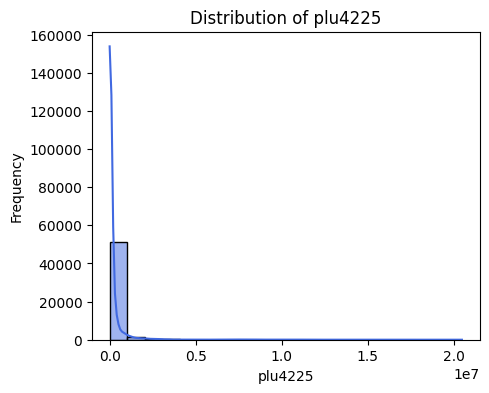

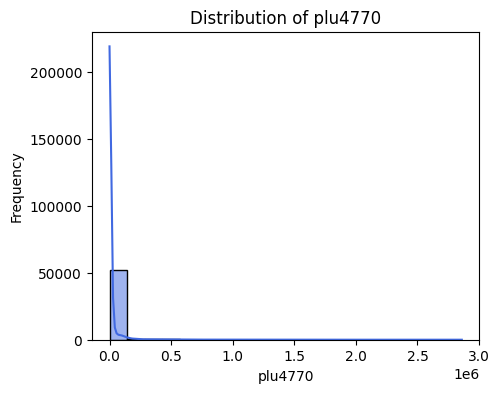

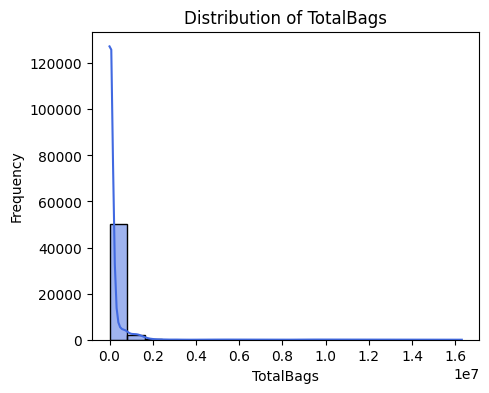

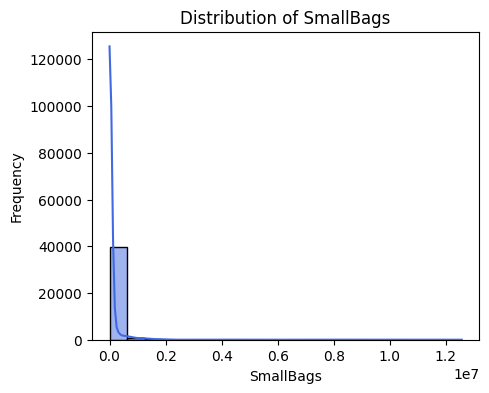

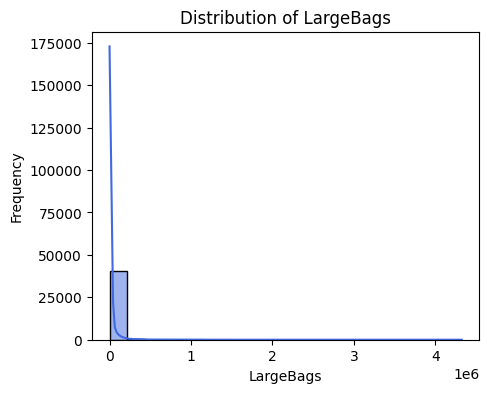

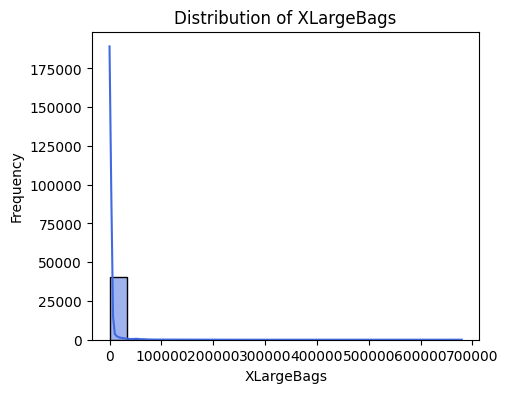

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

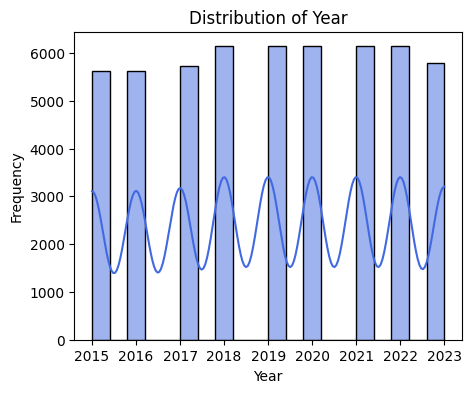

In [ ]:
for column in df.columns:
    plt.figure(figsize=(5, 4))
    if df[column].dtype in ['int64', 'float64']:
        sns.histplot(df[column], kde=True, bins=20, color='royalblue', edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


**Boxplot of Numeric Columns**

<Figure size 500x400 with 0 Axes>

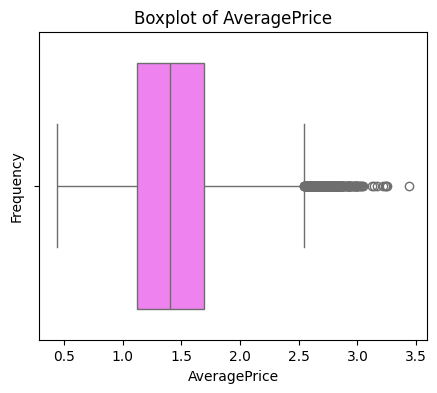

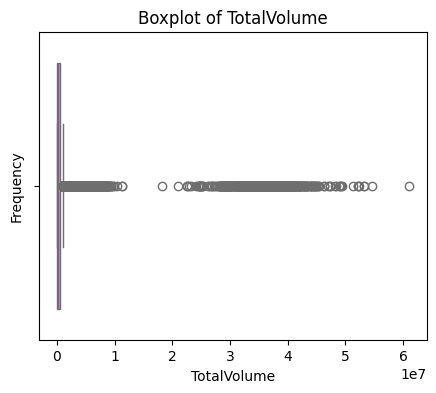

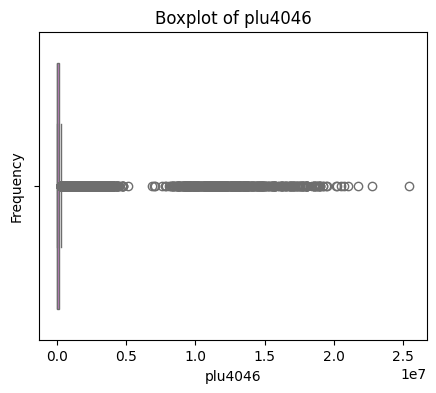

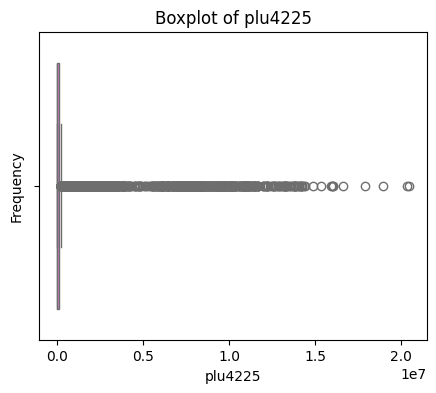

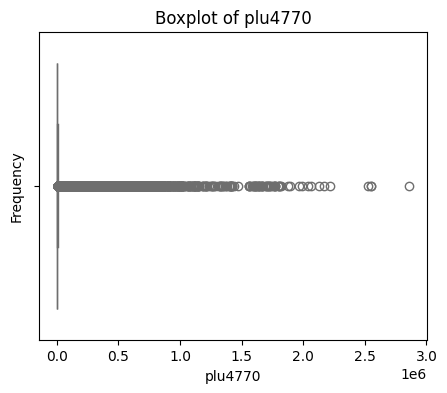

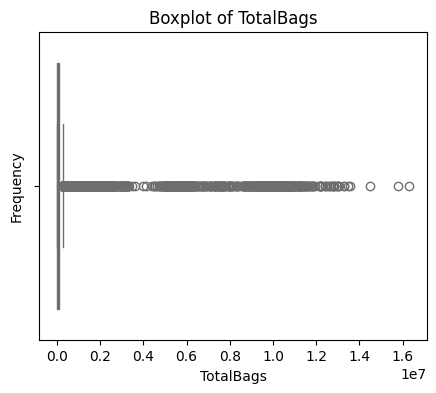

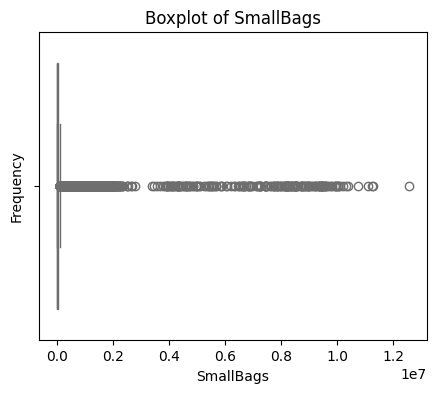

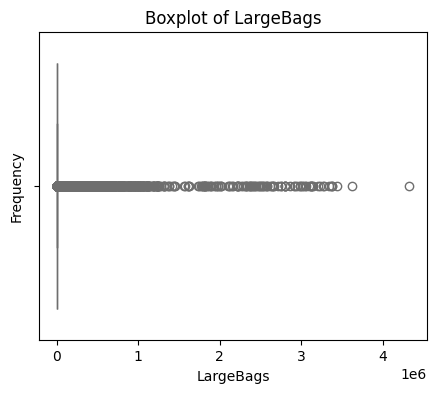

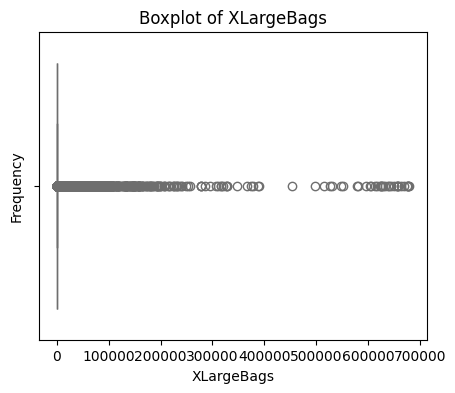

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

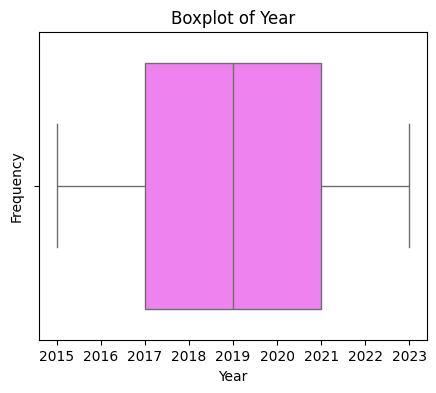

In [ ]:

for column in df.columns:
    plt.figure(figsize=(5, 4))
    if df[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=df[column], color='violet', boxprops=dict(facecolor='violet'))
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

**Total Avocado Volume by PLU**

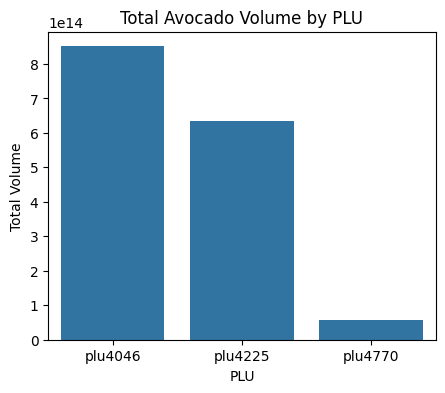

In [ ]:
df['TotalPLU4046'] = df['plu4046'].sum()
df['TotalPLU4225'] = df['plu4225'].sum()
df['TotalPLU4770'] = df['plu4770'].sum()

total_volume_by_plu = pd.DataFrame({
    'PLU': ['plu4046', 'plu4225', 'plu4770'],
    'TotalVolume': [df['TotalPLU4046'].sum(), df['TotalPLU4225'].sum(), df['TotalPLU4770'].sum()]
})

total_volume_by_plu = total_volume_by_plu.sort_values(by='TotalVolume', ascending=False)

plt.figure(figsize=(5, 4))
sns.barplot(x='PLU', y='TotalVolume', data=total_volume_by_plu)
plt.title('Total Avocado Volume by PLU')
plt.xlabel('PLU')
plt.ylabel('Total Volume')
plt.show()

### **Total Avocado Volume by Bag Size**

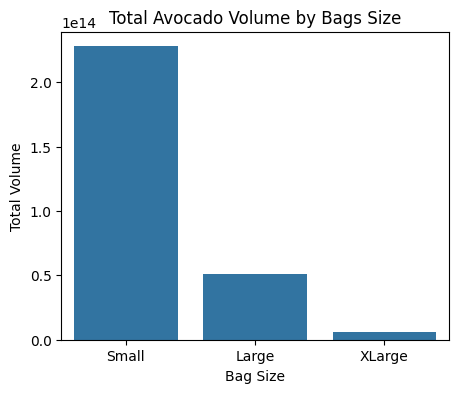

In [ ]:
df['TotalSmallBags'] = df['SmallBags'].sum()
df['TotalLargeBags'] = df['LargeBags'].sum()
df['TotalXLargeBags'] = df['XLargeBags'].sum()

total_volume_by_bags = pd.DataFrame({
    'BagSize': ['Small', 'Large', 'XLarge'],
    'TotalVolume': [df['TotalSmallBags'].sum(), df['TotalLargeBags'].sum(), df['TotalXLargeBags'].sum()]
})


total_volume_by_bags = total_volume_by_bags.sort_values(by='TotalVolume', ascending=False)

plt.figure(figsize=(5, 4))
sns.barplot(x='BagSize', y='TotalVolume', data=total_volume_by_bags)
plt.title('Total Avocado Volume by Bags Size')
plt.xlabel('Bag Size')
plt.ylabel('Total Volume')
plt.show()

### **Price Distribution for Each Avocado Type (2015-2023)**

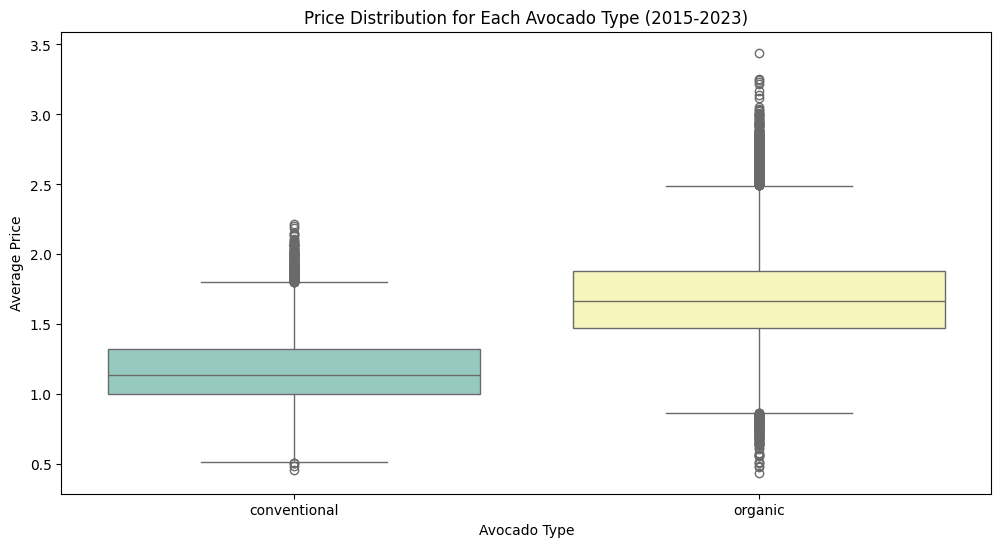

In [ ]:
df_filtered = df[(df['Date'] >= '2015-01-01') & (df['Date'] <= '2023-12-31')]

# Creating box plots for each avocado type
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='AveragePrice', data=df_filtered, palette='Set3')
plt.title('Price Distribution for Each Avocado Type (2015-2023)')
plt.xlabel('Avocado Type')
plt.ylabel('Average Price')
plt.show()


### **Scatter Plot: Total Bags vs. Total Volume**


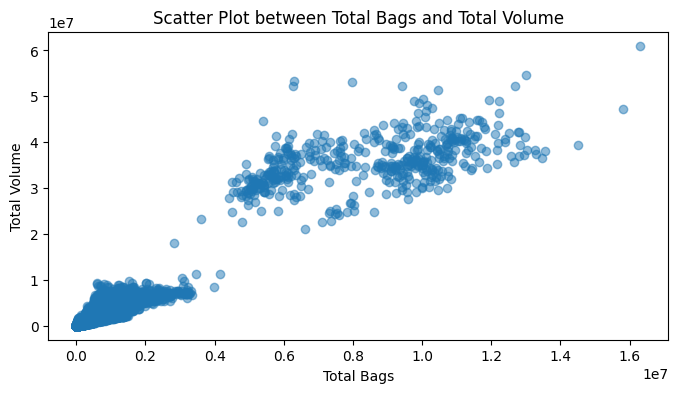

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(df['TotalBags'], df['TotalVolume'], alpha=0.5)
plt.title('Scatter Plot between Total Bags and Total Volume')
plt.xlabel('Total Bags')
plt.ylabel('Total Volume')
plt.show()


### **Average Avocados Sold per Day by Type (2015-2023)**

<Figure size 800x400 with 0 Axes>

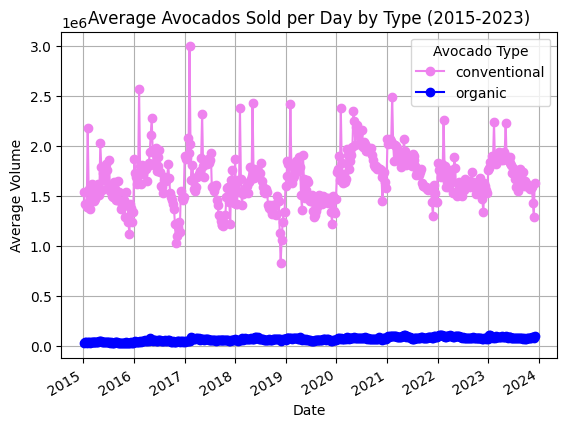

In [ ]:
df_filtered = df[(df['Date'] >= '2015-01-01') & (df['Date'] <= '2023-12-31')]


avg_sold_by_date_type = df_filtered.groupby(['Date', 'type'])['TotalVolume'].mean().reset_index()

pivot_table = avg_sold_by_date_type.pivot(index='Date', columns='type', values='TotalVolume')
plt.figure(figsize=(8,4))
pivot_table.plot(marker='o', linestyle='-', color=['violet', 'blue'])
plt.title('Average Avocados Sold per Day by Type (2015-2023)')
plt.xlabel('Date')
plt.ylabel('Average Volume')
plt.legend(title='Avocado Type')
plt.grid(True)
plt.show()

### **Time Series Plot of Average Avocado Price by Year**

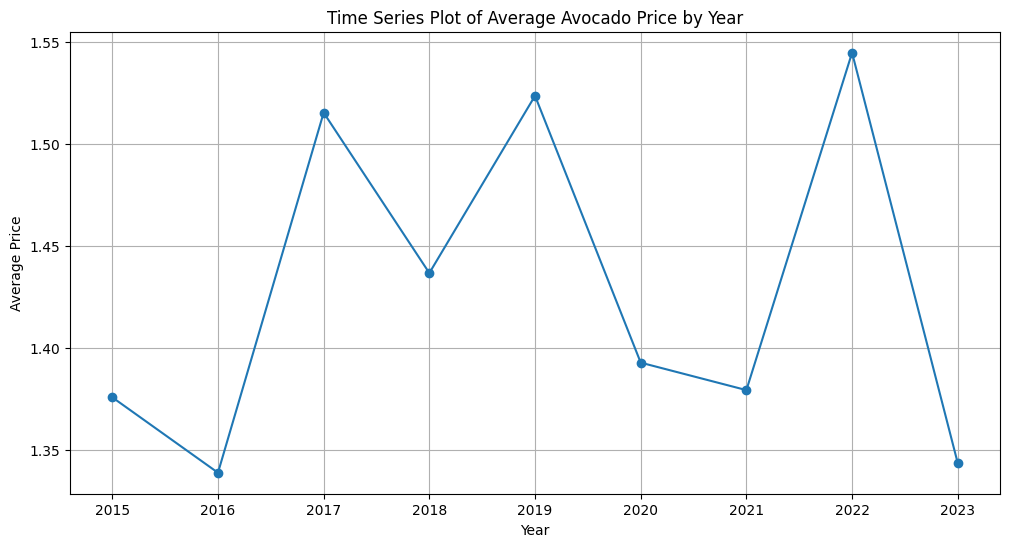

In [ ]:

avg_price_by_year = df.groupby('Year')['AveragePrice'].mean().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_year['Year'], avg_price_by_year['AveragePrice'], marker='o', linestyle='-')
plt.title('Time Series Plot of Average Avocado Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

### **Correlation Heatmap of Numerical Variables**

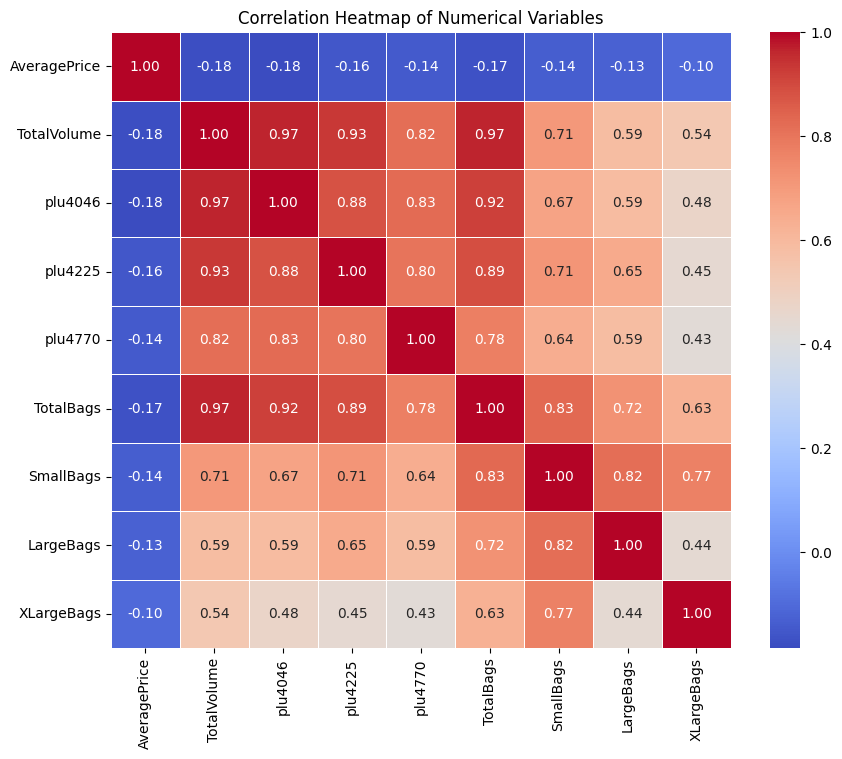

In [ ]:
selected_columns = ['AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']
selected_numerical_columns = df[selected_columns]
correlation_matrix = selected_numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [ ]:
columns_to_impute = ['SmallBags', 'LargeBags', 'XLargeBags']


### **Handling Missing Values in Bags Columns**

In [ ]:
df['SmallBags'] = df['SmallBags'].fillna(method='ffill')  # forward fill
df['XLargeBags'] = df['XLargeBags'].fillna(method='ffill')
df['LargeBags'] = df['LargeBags'].fillna(method='ffill')

In [ ]:
df.isnull().sum()


Date               0
AveragePrice       0
TotalVolume        0
plu4046            0
plu4225            0
plu4770            0
TotalBags          0
SmallBags          0
LargeBags          0
XLargeBags         0
type               0
region             0
Year               0
TotalPLU4046       0
TotalPLU4225       0
TotalPLU4770       0
TotalSmallBags     0
TotalLargeBags     0
TotalXLargeBags    0
dtype: int64

### **Outlier treatment**

<Axes: xlabel='TotalVolume', ylabel='Density'>

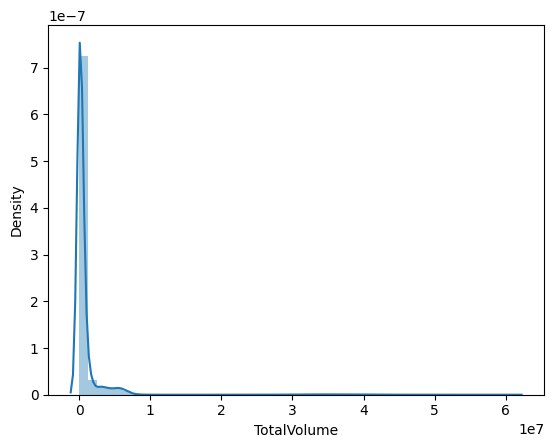

In [ ]:
import warnings

warnings.filterwarnings("ignore")
sns.distplot(df["TotalVolume"])


In [ ]:
features =["AveragePrice",'TotalVolume'	,'plu4046',	'plu4225'	,'plu4770'	,'TotalBags',	'SmallBags'	,'LargeBags'	,'XLargeBags'	]

In [ ]:
df_cap=df.copy()

### **IQR Capping**

In [ ]:
def iqr_capping(df,cols,factor):
       for col in cols:
          q1 = df[col].quantile(0.25)
          q3 = df[col].quantile(0.75)

          iqr = q3 -q1
          upper_whisker = q3 + (factor * iqr)
          lower_whisker = q1 - (factor * iqr)

          df[col] = np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))



In [ ]:
iqr_capping(df_cap,features,1.5)

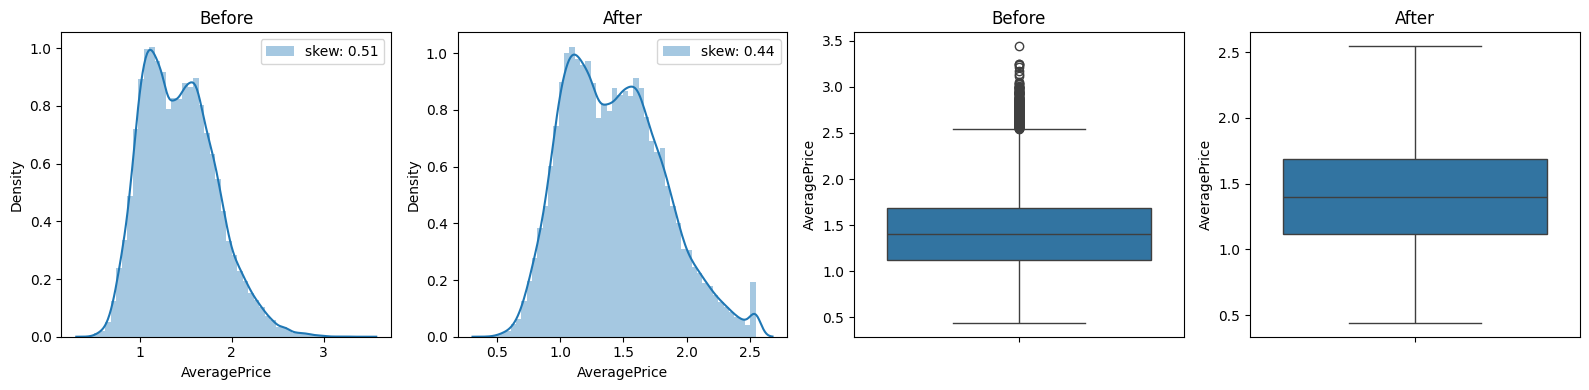

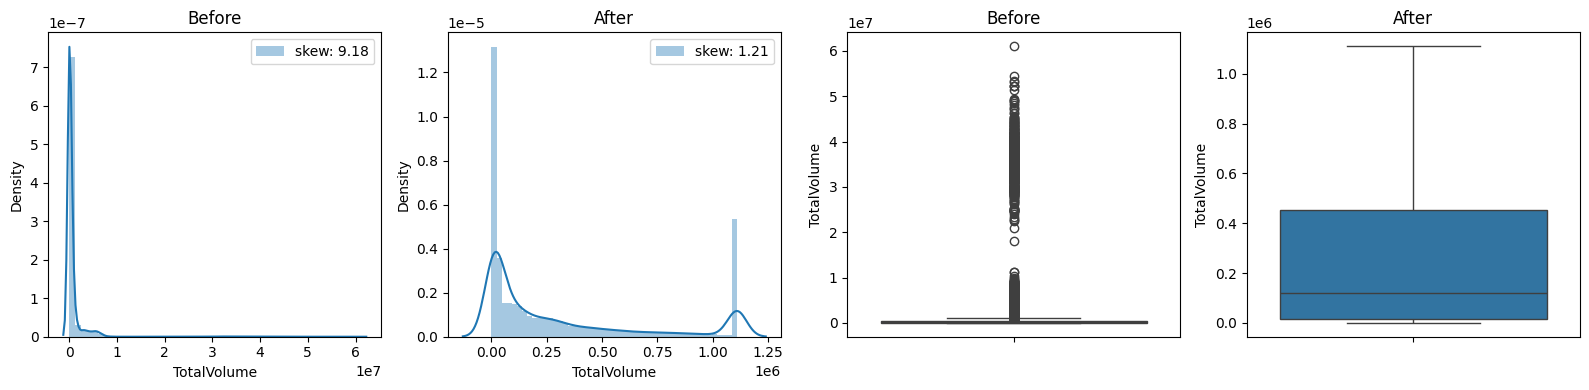

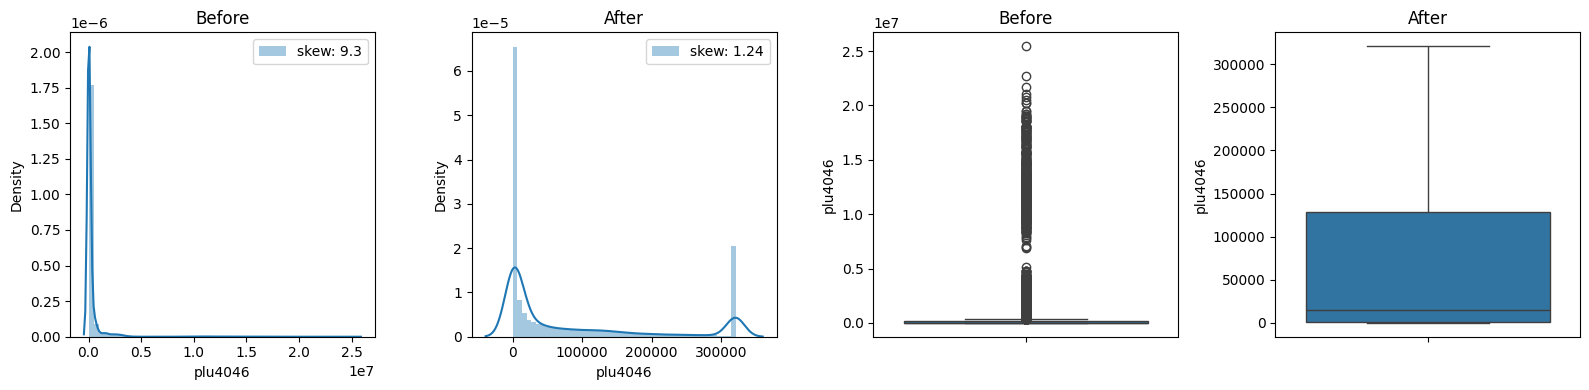

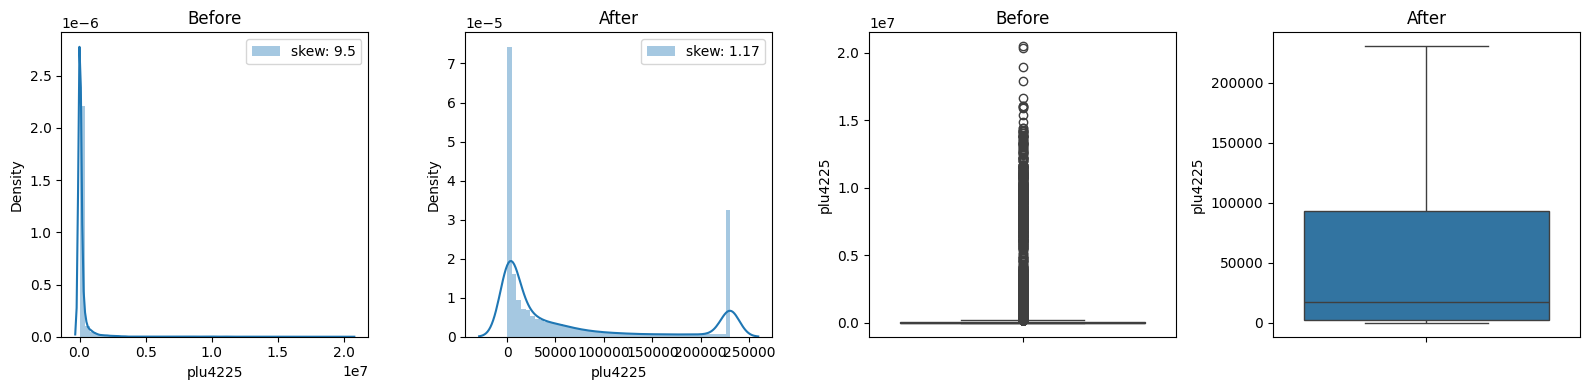

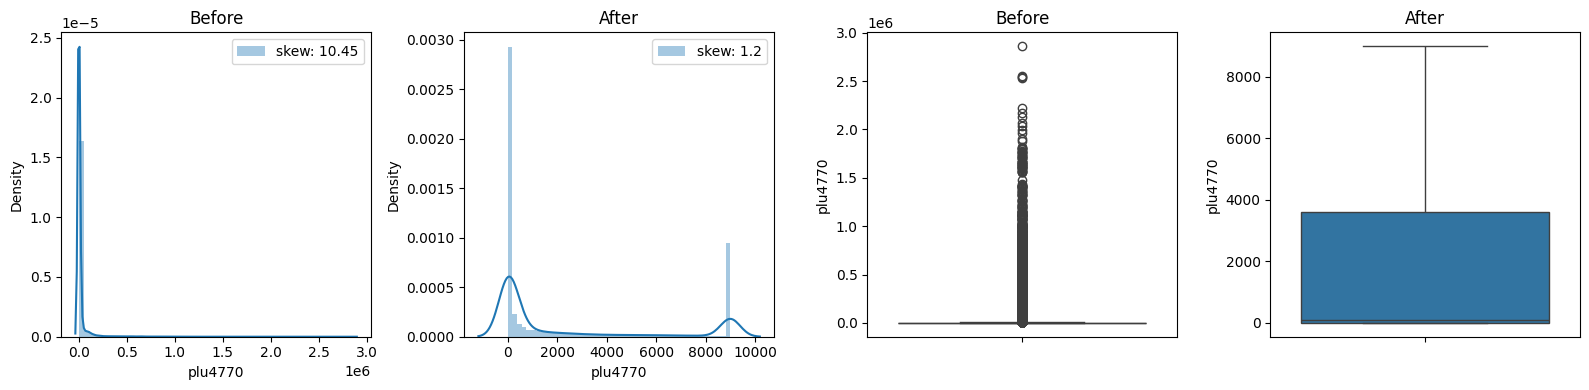

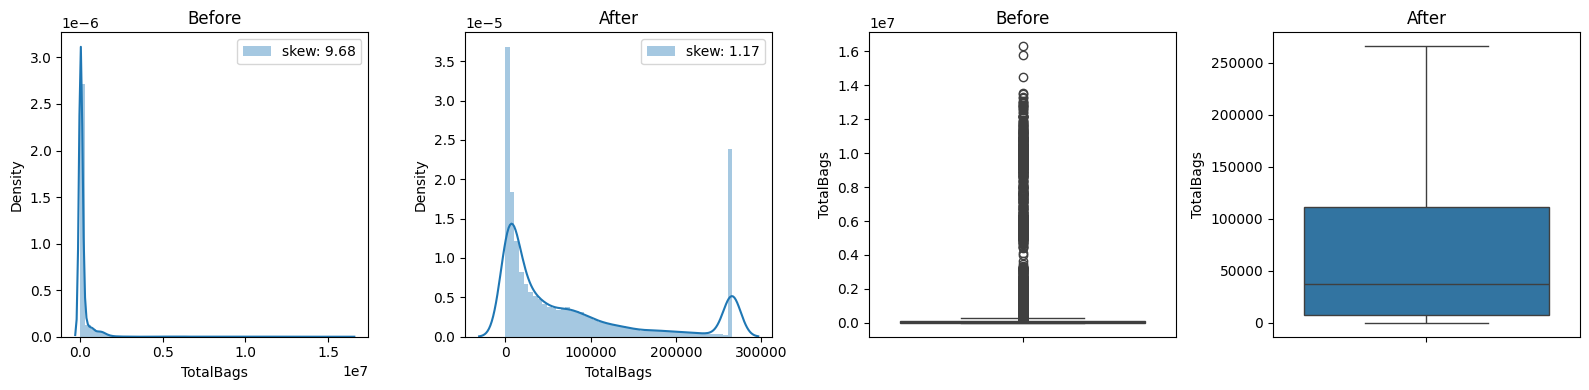

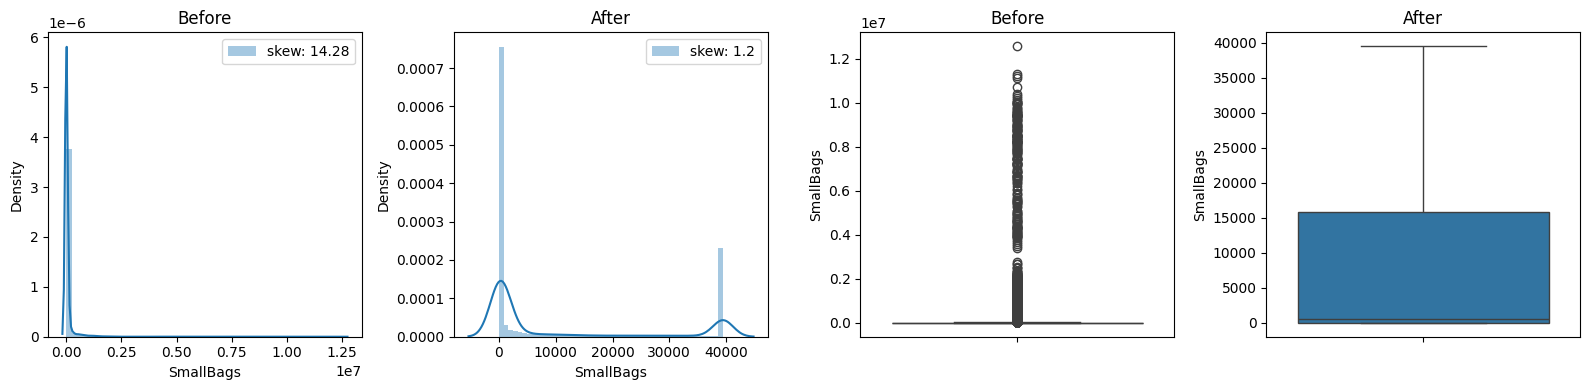

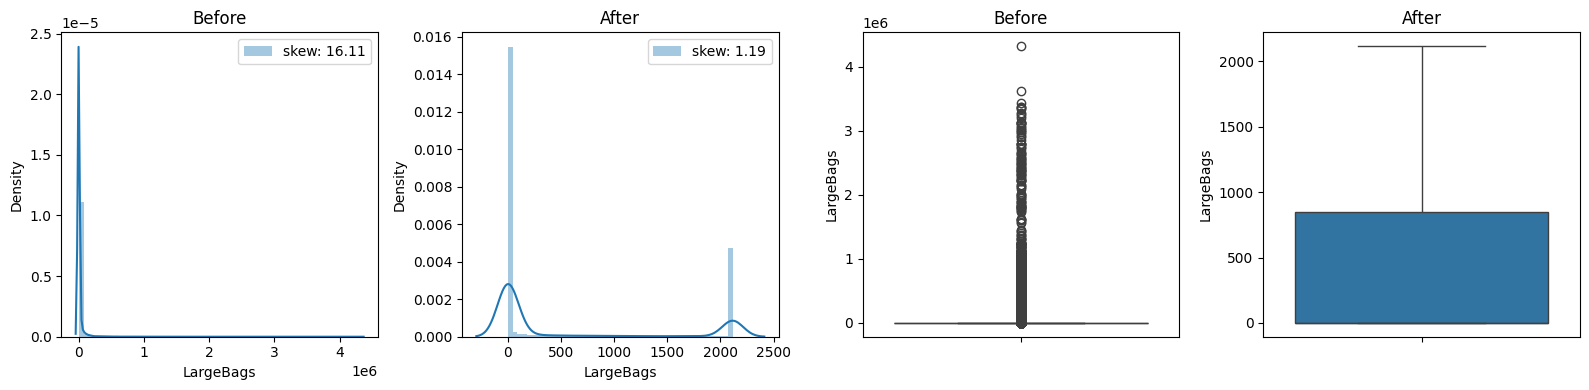

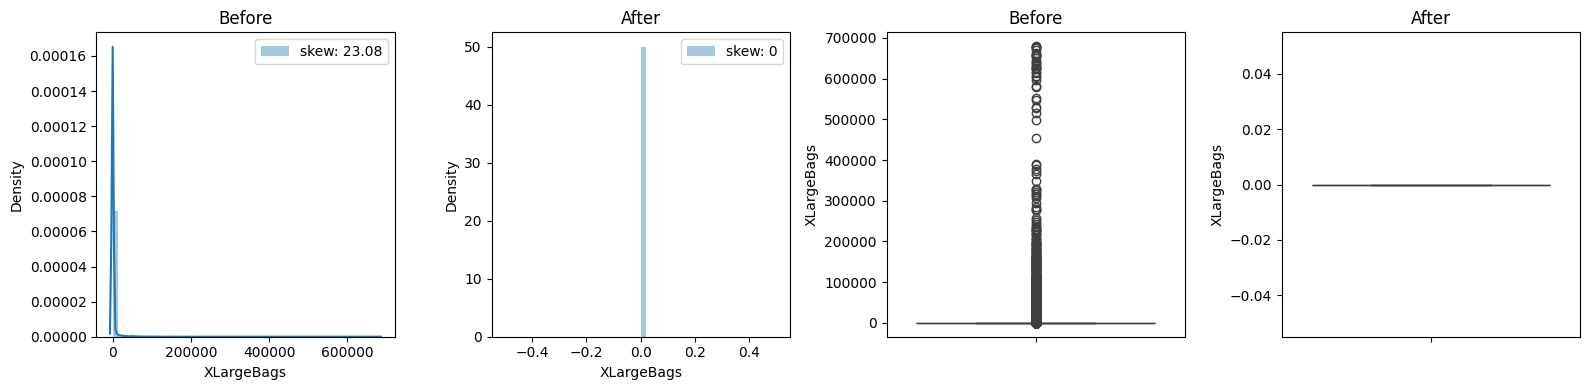

In [ ]:
for col in features:
  plt.figure(figsize=(16,4))

  plt.subplot(141)
  sns.distplot(df[col],label="skew: " + str(np.round(df[col].skew(),2)))
  plt.title("Before")
  plt.legend()

  plt.subplot(142)
  sns.distplot(df_cap[col],label="skew: " + str(np.round(df_cap[col].skew(),2)))
  plt.title("After")
  plt.legend()

  plt.subplot(143)
  sns.boxplot(df[col])
  plt.title("Before")

  plt.subplot(144)
  sns.boxplot(df_cap[col])
  plt.title("After")
  plt.tight_layout()
  plt.show()





In [ ]:
df.drop("region", axis=1, inplace=True)

### **Feature Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["type"] = le.fit_transform(df["type"]) # 1 for coventional and 0 for organic
df["type"].head(5)

0    0
1    1
2    0
3    1
4    0
Name: type, dtype: int64

In [ ]:
df = df.drop(['Date'], axis=1)

In [ ]:

columns_to_drop = ['TotalPLU4046', 'TotalPLU4225', 'TotalPLU4770', 'TotalSmallBags', 'TotalLargeBags', 'TotalXLargeBags']
df.drop(columns=columns_to_drop, inplace=True)
print(df.head())

   AveragePrice  TotalVolume    plu4046    plu4225   plu4770  TotalBags  \
0          1.22     40873.28    2819.50   28287.42     49.90    9716.46   
1          1.79      1373.95      57.42     153.88      0.00    1162.65   
2          1.00    435021.49  364302.39   23821.16     82.15   46815.79   
3          1.76      3846.69    1500.15     938.35      0.00    1408.19   
4          1.08    788025.06   53987.31  552906.04  39995.03  141136.68   

   SmallBags  LargeBags  XLargeBags  type  Year  
0    9186.93     529.53         0.0     0  2015  
1    1162.65       0.00         0.0     1  2015  
2   16707.15   30108.64         0.0     0  2015  
3    1071.35     336.84         0.0     1  2015  
4  137146.07    3990.61         0.0     0  2015  


### **Multicollinearity Assessment Using Variance Inflation Factor (VIF)**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

multi = df[['TotalVolume','LargeBags','plu4046','plu4225',	'plu4770','SmallBags','XLargeBags','TotalBags','type']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = multi.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(multi.values, i)
						for i in range(len(multi.columns))]

print(vif_data)

       feature        VIF
0  TotalVolume  82.202635
1    LargeBags   4.849064
2      plu4046  21.899199
3      plu4225  14.415613
4      plu4770   3.662723
5    SmallBags  10.300520
6   XLargeBags   4.128623
7    TotalBags  29.952513
8         type   1.007075


In [ ]:
df.corr()

,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,Year
AveragePrice,1.000000,-0.179153,-0.184299,-0.155367,-0.143928,-0.166318,-0.122167,-0.113966,-0.092132,0.661743,0.018679
TotalVolume,-0.179153,1.000000,0.966413,0.930966,0.817264,0.965620,0.615653,0.511634,0.471872,-0.226672,0.010772
plu4046,-0.184299,0.966413,1.000000,0.880644,0.828545,0.920839,0.538513,0.472419,0.380920,-0.221815,0.016433
plu4225,-0.155367,0.930966,0.880644,1.000000,0.803806,0.893413,0.657396,0.598834,0.411533,-0.220676,-0.049987
plu4770,-0.143928,0.817264,0.828545,0.803806,1.000000,0.775465,0.474351,0.434786,0.319344,-0.195586,-0.000710
TotalBags,-0.166318,0.965620,0.920839,0.893413,0.775465,1.000000,0.709716,0.620035,0.538853,-0.209642,0.019670
SmallBags,-0.122167,0.615653,0.538513,0.657396,0.474351,0.709716,1.000000,0.819422,0.774031,-0.139341,-0.086826
LargeBags,-0.113966,0.511634,0.472419,0.598834,0.434786,0.620035,0.819422,1.000000,0.446602,-0.117427,-0.123568
XLargeBags,-0.092132,0.471872,0.380920,0.411533,0.319344,0.538853,0.774031,0.446602,1.000000,-0.105709,-0.004110
type,0.661743,-0.226672,-0.221815,-0.220676,-0.195586,-0.209642,-0.139341,-0.117427,-0.105709,1.000000,0.000060



### **Multiple Linear Regression Analysis Using Ordinary Least Squares (OLS)**

In [ ]:
import statsmodels.api as smf

In [ ]:
Y = df[["AveragePrice"]]
X = df[['TotalVolume',	'plu4046',	'plu4225'	,'plu4770'	,'TotalBags','SmallBags' ,'LargeBags',	'XLargeBags',	'type']]
model = smf.OLS (Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           AveragePrice   R-squared (uncentered):                   0.681
Model:                            OLS   Adj. R-squared (uncentered):              0.681
Method:                 Least Squares   F-statistic:                          1.267e+04
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                        0.00
Time:                        13:20:34   Log-Likelihood:                         -66292.
No. Observations:               53415   AIC:                                  1.326e+05
Df Residuals:                   53406   BIC:                                  1.327e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
TotalVolume  1.985e-08      9e-09      2.206      0.027    2.21e-09    3.75e-08
plu4046     -6.131e-08   1.26e-08     -4.851      0.000   -8.61e-08   -3.65e-08
plu4225      1.496e-07    1.4e-08     10.669      0.000    1.22e-07    1.77e-07
plu4770      1.947e-07   6.53e-08      2.980      0.003    6.66e-08    3.23e-07
TotalBags    1.663e-07   2.22e-08      7.504      0.000    1.23e-07     2.1e-07
SmallBags    -9.75e-09   2.29e-08     -0.425      0.671   -5.47e-08    3.52e-08
LargeBags   -3.569e-07   6.01e-08     -5.940      0.000   -4.75e-07   -2.39e-07
XLargeBags  -6.461e-07   3.69e-07     -1.750      0.080   -1.37e-06    7.73e-08
type            1.6816      0.005    327.114      0.000       1.672       1.692
==============================================================================
Omnibus:                     1525.521   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1214.386
Skew:                          -0.290   Prob(JB):                    1.99e-264
Kurtosis:                       2.542   Cond. No.                     5.81e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Y = df[["AveragePrice"]]
X = df[['TotalVolume',	'plu4046',	'plu4225'	,'plu4770'	,'TotalBags','LargeBags','type']]
model = smf.OLS (Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           AveragePrice   R-squared (uncentered):                   0.681
Model:                            OLS   Adj. R-squared (uncentered):              0.681
Method:                 Least Squares   F-statistic:                          1.628e+04
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                        0.00
Time:                        13:20:35   Log-Likelihood:                         -66297.
No. Observations:               53415   AIC:                                  1.326e+05
Df Residuals:                   53408   BIC:                                  1.327e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
TotalVolume  1.415e-08   8.63e-09      1.639      0.101   -2.77e-09    3.11e-08
plu4046     -4.823e-08   1.19e-08     -4.040      0.000   -7.16e-08   -2.48e-08
plu4225      1.571e-07    1.3e-08     12.116      0.000    1.32e-07    1.83e-07
plu4770      1.945e-07   6.51e-08      2.988      0.003    6.69e-08    3.22e-07
TotalBags    1.557e-07   2.16e-08      7.220      0.000    1.13e-07    1.98e-07
LargeBags   -4.026e-07   4.58e-08     -8.800      0.000   -4.92e-07   -3.13e-07
type            1.6822      0.005    327.419      0.000       1.672       1.692
==============================================================================
Omnibus:                     1550.665   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1220.691
Skew:                          -0.288   Prob(JB):                    8.52e-266
Kurtosis:                       2.535   Cond. No.                     5.78e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Y = df[["AveragePrice"]]
X = df[['plu4046',	'plu4225'	,'plu4770'	,'TotalBags','LargeBags','type']]
model = smf.OLS (Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           AveragePrice   R-squared (uncentered):                   0.681
Model:                            OLS   Adj. R-squared (uncentered):              0.681
Method:                 Least Squares   F-statistic:                          1.899e+04
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                        0.00
Time:                        13:20:35   Log-Likelihood:                         -66299.
No. Observations:               53415   AIC:                                  1.326e+05
Df Residuals:                   53409   BIC:                                  1.327e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
plu4046    -3.493e-08   8.76e-09     -3.989      0.000   -5.21e-08   -1.78e-08
plu4225     1.713e-07   9.64e-09     17.771      0.000    1.52e-07     1.9e-07
plu4770     1.869e-07   6.49e-08      2.879      0.004    5.97e-08    3.14e-07
TotalBags   1.836e-07   1.32e-08     13.869      0.000    1.58e-07     2.1e-07
LargeBags  -4.434e-07   3.84e-08    -11.544      0.000   -5.19e-07   -3.68e-07
type           1.6819      0.005    327.492      0.000       1.672       1.692
==============================================================================
Omnibus:                     1602.013   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1237.058
Skew:                          -0.287   Prob(JB):                    2.38e-269
Kurtosis:                       2.523   Cond. No.                     2.60e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Y = df[["AveragePrice"]]
X = df[['plu4046',	'plu4225'	,'plu4770'	,'TotalBags','LargeBags','type']]

In [ ]:
df.shape
print(53415 * 0.25)

13353.75


### **Data Splitting for Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40061, 6)
X_test shape: (13354, 6)
y_train shape: (40061, 1)
y_test shape: (13354, 1)


### **Feature Scaling Using Min-Max Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_normal = mms.fit_transform(x_train)
X_train_normal

array([[7.89318963e-03, 1.16189666e-02, 4.77427929e-02, 1.55130865e-02,
        0.00000000e+00, 0.00000000e+00],
       [1.00780393e-03, 8.28722788e-04, 1.85161984e-05, 4.97899281e-04,
        0.00000000e+00, 0.00000000e+00],
       [3.55552922e-01, 3.53807924e-01, 2.04731787e-01, 6.44249411e-01,
        1.82145860e-01, 0.00000000e+00],
       ...,
       [4.14190922e-07, 5.72626874e-05, 0.00000000e+00, 2.31365962e-03,
        0.00000000e+00, 1.00000000e+00],
       [9.60754437e-02, 1.29502295e-01, 3.10295942e-02, 4.68996076e-02,
        4.09024523e-02, 0.00000000e+00],
       [1.74591659e-02, 3.94002618e-02, 6.67603669e-02, 5.07208505e-02,
        5.96618494e-02, 0.00000000e+00]])

In [ ]:
X_test_normal = mms.transform(x_test)
X_test_normal

array([[1.69307416e-05, 1.19012303e-04, 0.00000000e+00, 4.82920414e-04,
        0.00000000e+00, 1.00000000e+00],
       [2.56531820e-03, 4.15245785e-03, 8.33875525e-05, 5.76930523e-02,
        2.29694009e-03, 1.00000000e+00],
       [5.43871191e-07, 4.11224452e-06, 0.00000000e+00, 4.66803392e-05,
        1.18402550e-06, 1.00000000e+00],
       ...,
       [4.81710251e-03, 1.69039528e-01, 4.35982838e-02, 6.25686668e-02,
        1.41782544e-02, 0.00000000e+00],
       [1.66054406e-04, 9.90727049e-04, 7.58446999e-04, 1.21929738e-03,
        1.17250900e-04, 1.00000000e+00],
       [1.90565942e-04, 4.01405479e-06, 0.00000000e+00, 2.12438155e-04,
        0.00000000e+00, 1.00000000e+00]])


### **Creation of Validation Set**

In [ ]:
validationset = df.sample(n=1000)
validationset.shape

(1000, 11)

### **Model 1 - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import math

In [ ]:
Model1 = LinearRegression()

In [ ]:
Model1.fit(X_train_normal,y_train)

LinearRegression()

In [ ]:
Model1.score(X_train_normal,y_train)

0.4419877868325338

In [ ]:
pred = Model1.predict(X_test_normal)
res1 = pd.DataFrame()
res1 = pd.concat([x_test,res1],axis=1)
res1["Actual_charges"] = y_test
res1["pred_charges"] = pred
res1

,plu4046,plu4225,plu4770,TotalBags,LargeBags,type,Actual_charges,pred_charges
18988,430.84,2436.25,0.00,7870.78,0.00,1,1.762750,1.688622
41018,65280.17,85003.19,212.79,940298.46,9932.50,1,1.624900,1.709841
4969,13.84,84.18,0.00,760.81,5.12,1,1.940000,1.688347
42183,2527095.16,796196.77,60784.30,1596537.39,0.00,0,1.118273,1.112079
50529,224.87,2563.94,0.00,18010.47,0.00,1,1.679652,1.688887
...,...,...,...,...,...,...,...,...
10365,230696.56,55531.58,17669.83,170583.00,93470.50,0,1.110000,1.150900
10405,9100.10,55557.73,1578.23,59969.03,29180.53,0,1.370000,1.172494
6753,122581.78,3460335.94,111254.96,1019762.67,61310.05,0,1.130000,1.377970
8480,4225.62,20280.75,1935.42,19872.47,507.02,1,2.280000,1.689760


### **Model Evaluation Metrics Calculation**

In [ ]:
R2 = r2_score(res1["Actual_charges"], res1["pred_charges"])
print("R-squared:", R2)
MAE = mean_absolute_error(res1["Actual_charges"], res1["pred_charges"])
print("Mean Absolute Error:", MAE)
MSE = mean_squared_error(res1["Actual_charges"], res1["pred_charges"])
print("Mean Squared Error:",MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error:", RMSE)
n = len(res1["Actual_charges"])
k = X_test_normal.shape[1]

adjusted_r_squared = 1 - ((1 - R2) * (n - 1) / (n - k - 1))
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")

R-squared: 0.4525723255159647
Mean Absolute Error: 0.22395166287148802
Mean Squared Error: 0.08456435248731078
Root Mean Squared Error: 0.29079950565176477
Adjusted R-squared: 0.4523


In [ ]:
res1["error"] = res1["Actual_charges"] - res1["pred_charges"]
res1.head(2)

,plu4046,plu4225,plu4770,TotalBags,LargeBags,type,Actual_charges,pred_charges,error
18988,430.84,2436.25,0.00,7870.78,0.0,1,1.76275,1.688622,0.074128
41018,65280.17,85003.19,212.79,940298.46,9932.5,1,1.62490,1.709841,-0.084942


In [ ]:
res1["error"].mean()

-0.002104396002451295

<Axes: xlabel='error', ylabel='Density'>

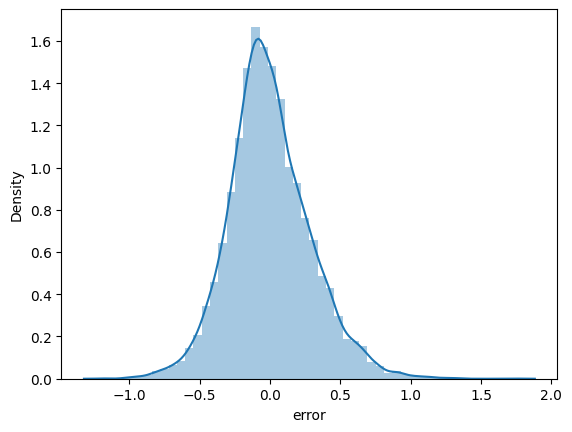

In [ ]:
sns.distplot(res1["error"])


### **Cross-Validation R-squared Scores**

In [ ]:
cv_scores = cross_val_score(Model1, X_train_normal, y_train, cv=5, scoring='r2')
print("R-squared scores for each fold:", cv_scores)
print("Average R-squared:", np.mean(cv_scores))

R-squared scores for each fold: [0.43499129 0.43820012 0.45808861 0.43141739 0.44598506]
Average R-squared: 0.44173649524827424


### **Evaluation on Validation Set**

In [ ]:
Y = validationset[["AveragePrice"]]
X = validationset[['plu4046',	'plu4225'	,'plu4770'	,'TotalBags','LargeBags','type']]
val_x = mms.transform(X)
pre_val = Model1.predict(val_x)
r_squared_val = r2_score(Y, pre_val)
print("R-squared for validation set:", r_squared_val)
n_val = len(Y)
k_val = X.shape[1]
adjusted_r_squared_val = 1 - ((1 - r_squared_val) * (n_val - 1) / (n_val - k_val - 1))
print("Adjusted R-squared for validation set:", adjusted_r_squared_val)

R-squared for validation set: 0.45814814287403605
Adjusted R-squared for validation set: 0.45487411352584284


### **Model 2 -Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Model2 = RandomForestRegressor(random_state=42)


In [ ]:
Model2.fit(X_train_normal, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
Model2.score(X_train_normal, y_train)

0.9633118927230155

In [ ]:
pred = Model2.predict(X_test_normal)
res2 = pd.DataFrame()
res2 = pd.concat([x_test,res2],axis=1)
res2["Actual_charges"] = y_test
res2["pred_charges"] = pred
res2

,plu4046,plu4225,plu4770,TotalBags,LargeBags,type,Actual_charges,pred_charges
18988,430.84,2436.25,0.00,7870.78,0.00,1,1.762750,1.764178
41018,65280.17,85003.19,212.79,940298.46,9932.50,1,1.624900,1.601752
4969,13.84,84.18,0.00,760.81,5.12,1,1.940000,1.687763
42183,2527095.16,796196.77,60784.30,1596537.39,0.00,0,1.118273,0.868170
50529,224.87,2563.94,0.00,18010.47,0.00,1,1.679652,1.625634
...,...,...,...,...,...,...,...,...
10365,230696.56,55531.58,17669.83,170583.00,93470.50,0,1.110000,1.068178
10405,9100.10,55557.73,1578.23,59969.03,29180.53,0,1.370000,1.320000
6753,122581.78,3460335.94,111254.96,1019762.67,61310.05,0,1.130000,1.140840
8480,4225.62,20280.75,1935.42,19872.47,507.02,1,2.280000,2.161895


In [ ]:
R2 = r2_score(res2["Actual_charges"], res2["pred_charges"])
print("R-squared:", R2)
MAE = mean_absolute_error(res2["Actual_charges"], res2["pred_charges"])
print("Mean Absolute Error:", MAE)
MSE = mean_squared_error(res2["Actual_charges"], res2["pred_charges"])
print("Mean Squared Error:",MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error:", RMSE)
n = len(res2["Actual_charges"])
k = X_test_normal.shape[1]
adjusted_r_squared = 1 - ((1 - R2) * (n - 1) / (n - k - 1))
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")

R-squared: 0.7489503523402126
Mean Absolute Error: 0.1430108147991613
Mean Squared Error: 0.03878110641104712
Root Mean Squared Error: 0.19692919136341144
Adjusted R-squared: 0.7488


In [ ]:
res2["error"] = res2["Actual_charges"] - res2["pred_charges"]
res2.head(2)

,plu4046,plu4225,plu4770,TotalBags,LargeBags,type,Actual_charges,pred_charges,error
18988,430.84,2436.25,0.00,7870.78,0.0,1,1.76275,1.764178,-0.001428
41018,65280.17,85003.19,212.79,940298.46,9932.5,1,1.62490,1.601752,0.023148


In [ ]:
res2["error"].mean()

-0.0034273057687000427

<Axes: xlabel='error', ylabel='Density'>

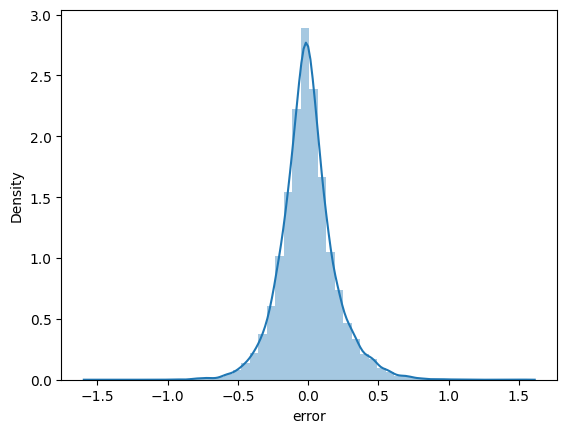

In [ ]:
sns.distplot(res2["error"])

In [ ]:
cv_scores = cross_val_score(Model2, X_train_normal, y_train, cv=5, scoring='r2')
print("R-squared scores for each fold:", cv_scores)
print("Average R-squared:", np.mean(cv_scores))

R-squared scores for each fold: [0.73022819 0.73168464 0.74227726 0.73214206 0.72489247]
Average R-squared: 0.7322449222507469


In [ ]:
Y = validationset[["AveragePrice"]]
X = validationset[['plu4046',	'plu4225'	,'plu4770'	,'TotalBags','LargeBags','type']]
val_x = mms.transform(X)
pre_val = Model2.predict(val_x)
r_squared_val = r2_score(Y, pre_val)
print("R-squared for validation set:", r_squared_val)
n_val = len(Y)
k_val = X.shape[1]
adjusted_r_squared_val = 1 - ((1 - r_squared_val) * (n_val - 1) / (n_val - k_val - 1))
print("Adjusted R-squared for validation set:", adjusted_r_squared_val)

R-squared for validation set: 0.927335325612226
Adjusted R-squared for validation set: 0.9268962641355627


### **Model 3 - Desicion Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
Model3 = DecisionTreeRegressor(random_state=42)

In [ ]:
Model3.fit(X_train_normal, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
Model3.score(X_train_normal, y_train)

1.0

In [ ]:
pred = Model3.predict(X_test_normal)
res3 = pd.DataFrame()
res3 = pd.concat([x_test,res3],axis=1)
res3["Actual_charges"] = y_test
res3["pred_charges"] = pred
res3

,plu4046,plu4225,plu4770,TotalBags,LargeBags,type,Actual_charges,pred_charges
18988,430.84,2436.25,0.00,7870.78,0.00,1,1.762750,1.744930
41018,65280.17,85003.19,212.79,940298.46,9932.50,1,1.624900,0.740000
4969,13.84,84.18,0.00,760.81,5.12,1,1.940000,1.640000
42183,2527095.16,796196.77,60784.30,1596537.39,0.00,0,1.118273,0.865252
50529,224.87,2563.94,0.00,18010.47,0.00,1,1.679652,1.496201
...,...,...,...,...,...,...,...,...
10365,230696.56,55531.58,17669.83,170583.00,93470.50,0,1.110000,1.580000
10405,9100.10,55557.73,1578.23,59969.03,29180.53,0,1.370000,1.290000
6753,122581.78,3460335.94,111254.96,1019762.67,61310.05,0,1.130000,1.090000
8480,4225.62,20280.75,1935.42,19872.47,507.02,1,2.280000,2.110000


In [ ]:
R2 = r2_score(res3["Actual_charges"], res3["pred_charges"])
print("R-squared:", R2)
MAE = mean_absolute_error(res3["Actual_charges"], res3["pred_charges"])
print("Mean Absolute Error:", MAE)
MSE = mean_squared_error(res3["Actual_charges"], res3["pred_charges"])
print("Mean Squared Error:",MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error:", RMSE)
n = len(res3["Actual_charges"])
k = X_test_normal.shape[1]
adjusted_r_squared = 1 - ((1 - R2) * (n - 1) / (n - k - 1))
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")

R-squared: 0.5040029655458074
Mean Absolute Error: 0.19019941876546353
Mean Squared Error: 0.07661956091967431
Root Mean Squared Error: 0.276802386044041
Adjusted R-squared: 0.5038


In [ ]:
res3["error"] = res3["Actual_charges"] - res3["pred_charges"]
res3.head(2)

,plu4046,plu4225,plu4770,TotalBags,LargeBags,type,Actual_charges,pred_charges,error
18988,430.84,2436.25,0.00,7870.78,0.0,1,1.76275,1.74493,0.017821
41018,65280.17,85003.19,212.79,940298.46,9932.5,1,1.62490,0.74000,0.884900


In [ ]:
res3["error"].mean()


-0.003011142686386102

<Axes: xlabel='error', ylabel='Density'>

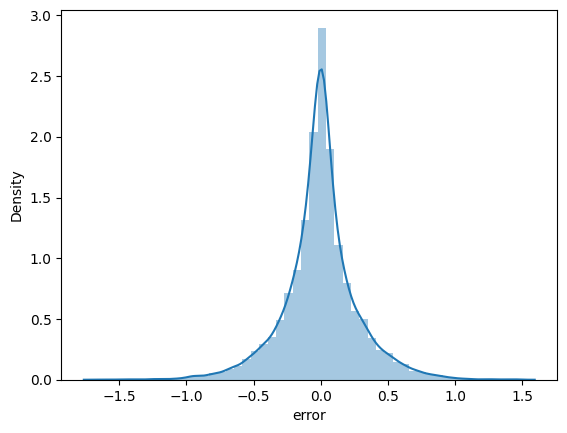

In [ ]:
sns.distplot(res3["error"])

In [ ]:

cv_scores = cross_val_score(Model3, X_train_normal, y_train, cv=5, scoring='r2')
print("R-squared scores for each fold:", cv_scores)
print("Average R-squared:", np.mean(cv_scores))

R-squared scores for each fold: [0.47444919 0.46974635 0.51009215 0.47552016 0.46574259]
Average R-squared: 0.4791100880129669


In [ ]:
Y = validationset[["AveragePrice"]]
X = validationset[['plu4046',	'plu4225'	,'plu4770'	,'TotalBags','LargeBags','type']]
val_x = mms.transform(X)
pre_val = Model3.predict(val_x)
r_squared_val = r2_score(Y, pre_val)
print("R-squared for validation set:", r_squared_val)
n_val = len(Y)
k_val = X.shape[1]
adjusted_r_squared_val = 1 - ((1 - r_squared_val) * (n_val - 1) / (n_val - k_val - 1))
print("Adjusted R-squared for validation set:", adjusted_r_squared_val)

R-squared for validation set: 0.9020053108737934
Adjusted R-squared for validation set: 0.9014131979485596


### **Model 4 - Support vector regressor**

In [ ]:
from sklearn.svm import SVR

In [ ]:
Model4 = SVR()

In [ ]:
Model4.fit(X_train_normal, y_train)

SVR()

In [ ]:
Model4.score(X_train_normal, y_train)

0.45712292786092934

In [ ]:
pred = Model4.predict(X_test_normal)
res4 = pd.DataFrame()
res4 = pd.concat([x_test,res4],axis=1)
res4["Actual_charges"] = y_test
res4["pred_charges"] = pred
res4

,plu4046,plu4225,plu4770,TotalBags,LargeBags,type,Actual_charges,pred_charges
18988,430.84,2436.25,0.00,7870.78,0.00,1,1.762750,1.680028
41018,65280.17,85003.19,212.79,940298.46,9932.50,1,1.624900,1.559913
4969,13.84,84.18,0.00,760.81,5.12,1,1.940000,1.680424
42183,2527095.16,796196.77,60784.30,1596537.39,0.00,0,1.118273,1.054551
50529,224.87,2563.94,0.00,18010.47,0.00,1,1.679652,1.678681
...,...,...,...,...,...,...,...,...
10365,230696.56,55531.58,17669.83,170583.00,93470.50,0,1.110000,1.088238
10405,9100.10,55557.73,1578.23,59969.03,29180.53,0,1.370000,1.154744
6753,122581.78,3460335.94,111254.96,1019762.67,61310.05,0,1.130000,1.310629
8480,4225.62,20280.75,1935.42,19872.47,507.02,1,2.280000,1.681493


In [ ]:
R2 = r2_score(res4["Actual_charges"], res4["pred_charges"])
print("R-squared:", R2)
MAE = mean_absolute_error(res4["Actual_charges"], res4["pred_charges"])
print("Mean Absolute Error:", MAE)
MSE = mean_squared_error(res4["Actual_charges"], res4["pred_charges"])
print("Mean Squared Error:",MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error:", RMSE)
n = len(res4["Actual_charges"])
k = X_test_normal.shape[1]
adjusted_r_squared = 1 - ((1 - R2) * (n - 1) / (n - k - 1))
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")

R-squared: 0.46791519100557855
Mean Absolute Error: 0.21916785993100124
Mean Squared Error: 0.08219425037902407
Root Mean Squared Error: 0.28669539650825243
Adjusted R-squared: 0.4677


In [ ]:
res4["error"] = res4["Actual_charges"] - res4["pred_charges"]
res4.head(2)

,plu4046,plu4225,plu4770,TotalBags,LargeBags,type,Actual_charges,pred_charges,error
18988,430.84,2436.25,0.00,7870.78,0.0,1,1.76275,1.680028,0.082723
41018,65280.17,85003.19,212.79,940298.46,9932.5,1,1.62490,1.559913,0.064986


In [ ]:
res4["error"].mean()

0.015948679366359016

<Axes: xlabel='error', ylabel='Density'>

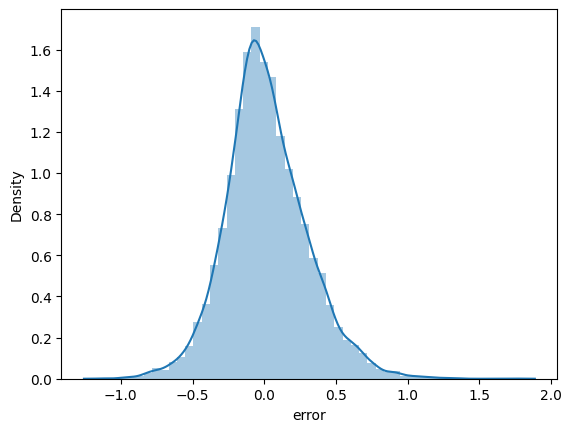

In [ ]:
sns.distplot(res4["error"])

In [ ]:
cv_scores = cross_val_score(Model4, X_train_normal, y_train, cv=5, scoring='r2')
print("R-squared scores for each fold:", cv_scores)
print("Average R-squared:", np.mean(cv_scores))

R-squared scores for each fold: [0.44933868 0.45212449 0.47058097 0.44666283 0.46061298]
Average R-squared: 0.45586398928162125


In [ ]:
Y = validationset[["AveragePrice"]]
X = validationset[['plu4046',	'plu4225'	,'plu4770'	,'TotalBags','LargeBags','type']]
val_x = mms.transform(X)
pre_val = Model4.predict(val_x)
r_squared_val = r2_score(Y, pre_val)
print("R-squared for validation set:", r_squared_val)
n_val = len(Y)
k_val = X.shape[1]
adjusted_r_squared_val = 1 - ((1 - r_squared_val) * (n_val - 1) / (n_val - k_val - 1))
print("Adjusted R-squared for validation set:", adjusted_r_squared_val)

R-squared for validation set: 0.4713916886104865
Adjusted R-squared for validation set: 0.46819768068668277


### **Model 5 -XGB REgressor**

In [ ]:
import xgboost as xgb

In [ ]:
Model5 = xgb.XGBRegressor()

In [ ]:
Model5.fit(X_train_normal, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
Model5.score(X_train_normal, y_train)

0.7676884524587765

In [ ]:
pred = Model5.predict(X_test_normal)
res5 = pd.DataFrame()
res5 = pd.concat([x_test,res5],axis=1)
res5["Actual_charges"] = y_test
res5["pred_charges"] = pred
res5

,plu4046,plu4225,plu4770,TotalBags,LargeBags,type,Actual_charges,pred_charges
18988,430.84,2436.25,0.00,7870.78,0.00,1,1.762750,1.803461
41018,65280.17,85003.19,212.79,940298.46,9932.50,1,1.624900,1.474330
4969,13.84,84.18,0.00,760.81,5.12,1,1.940000,1.664340
42183,2527095.16,796196.77,60784.30,1596537.39,0.00,0,1.118273,0.968437
50529,224.87,2563.94,0.00,18010.47,0.00,1,1.679652,1.713651
...,...,...,...,...,...,...,...,...
10365,230696.56,55531.58,17669.83,170583.00,93470.50,0,1.110000,0.970331
10405,9100.10,55557.73,1578.23,59969.03,29180.53,0,1.370000,1.237050
6753,122581.78,3460335.94,111254.96,1019762.67,61310.05,0,1.130000,1.312455
8480,4225.62,20280.75,1935.42,19872.47,507.02,1,2.280000,1.895895


In [ ]:
R2 = r2_score(res5["Actual_charges"], res5["pred_charges"])
print("R-squared:", R2)
MAE = mean_absolute_error(res5["Actual_charges"], res5["pred_charges"])
print("Mean Absolute Error:", MAE)
MSE = mean_squared_error(res5["Actual_charges"], res5["pred_charges"])
print("Mean Squared Error:",MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error:", RMSE)
n = len(res5["Actual_charges"])
k = X_test_normal.shape[1]
adjusted_r_squared = 1 - ((1 - R2) * (n - 1) / (n - k - 1))
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")

R-squared: 0.70607215756549
Mean Absolute Error: 0.16178784943796595
Mean Squared Error: 0.04540475177272302
Root Mean Squared Error: 0.2130839078220667
Adjusted R-squared: 0.7059


In [ ]:
res5["error"] = res5["Actual_charges"] - res5["pred_charges"]
res5.head(2)

,plu4046,plu4225,plu4770,TotalBags,LargeBags,type,Actual_charges,pred_charges,error
18988,430.84,2436.25,0.00,7870.78,0.0,1,1.76275,1.803461,-0.040711
41018,65280.17,85003.19,212.79,940298.46,9932.5,1,1.62490,1.474330,0.150569


In [ ]:
res5["error"].mean()

-0.0016265940502889259

<Axes: xlabel='error', ylabel='Density'>

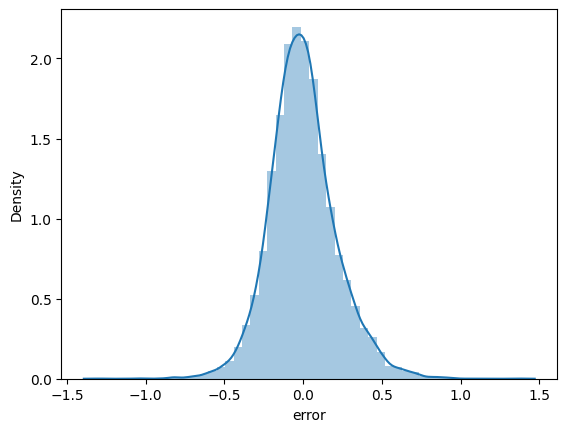

In [ ]:
sns.distplot(res5["error"])

In [ ]:
cv_scores = cross_val_score(Model5, X_train_normal, y_train, cv=5, scoring='r2')
print("R-squared scores for each fold:", cv_scores)
print("Average R-squared:", np.mean(cv_scores))

R-squared scores for each fold: [0.68264145 0.68833178 0.70215613 0.69006808 0.68023498]
Average R-squared: 0.6886864861045523


Result:


In [ ]:
Y = validationset[["AveragePrice"]]
X = validationset[['plu4046',	'plu4225'	,'plu4770'	,'TotalBags','LargeBags','type']]
val_x = mms.transform(X)
pre_val = Model5.predict(val_x)
r_squared_val = r2_score(Y, pre_val)
print("R-squared for validation set:", r_squared_val)
n_val = len(Y)
k_val = X.shape[1]
adjusted_r_squared_val = 1 - ((1 - r_squared_val) * (n_val - 1) / (n_val - k_val - 1))
print("Adjusted R-squared for validation set:", adjusted_r_squared_val)

R-squared for validation set: 0.7722160476347149
Adjusted R-squared for validation set: 0.7708397095539579


# **Hyperparameter Tuning using Gridsearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

### **LR - Linear Regression**

In [ ]:
from sklearn.linear_model import Lasso


In [ ]:
LR = LinearRegression()

In [ ]:
# L1 regularization
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                'max_iter': [100, 500, 1000]}

In [ ]:
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_normal, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000]},
             scoring='r2')

In [ ]:
print("Best Lasso Parameters:", lasso_grid.best_params_)

Best Lasso Parameters: {'alpha': 0.001, 'max_iter': 100}


In [ ]:
Lasso_score =lasso_grid.score(X_train_normal, y_train)
print(f"Lasso_score  :{Lasso_score}")
lasso_best = lasso_grid.best_estimator_
lasso_predict = lasso_best.predict(X_test_normal)
accuracy_lasso = mean_absolute_error(y_test, lasso_predict)
lasso_mse = mean_squared_error(y_test, lasso_predict)
lasso_r2 = r2_score(y_test, lasso_predict)
print("Lasso Mean Absolute Error on Test Set:", accuracy_lasso)
print("Lasso MSE on Test Set:", lasso_mse)
print("Lasso R2 Score on Test Set:", lasso_r2)
n = len(y_test)  # Number of samples
k = X_test_normal.shape[1]  # Number of predictors
adjusted_r2 = 1 - ((1 - lasso_r2) * (n - 1) / (n - k - 1))
print(f"Lasso Adjusted R-squared on Test Set: {adjusted_r2:.4f}")

Lasso_score  :0.4352239743255699
Lasso Mean Absolute Error on Test Set: 0.22559483425978058
Lasso MSE on Test Set: 0.08562174632997331
Lasso R2 Score on Test Set: 0.4457272822409116
Lasso Adjusted R-squared on Test Set: 0.4455


In [ ]:
lasso_grid.fit(X,Y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000]},
             scoring='r2')

In [ ]:
best_model = lasso_grid.best_estimator_

In [ ]:
val_predictions = best_model.predict(X)


val_r2 = best_model.score(X, Y)
print("R-squared on Validation Set:", val_r2)

R-squared on Validation Set: 0.45939349998863077


In [ ]:
n_val = len(Y)
k_val = X.shape[1]


adjusted_r_squared_val = 1 - ((1 - val_r2) * (n_val - 1) / (n_val - k_val - 1))
print("Adjusted R-squared for Validation Set:", adjusted_r_squared_val)

Adjusted R-squared for Validation Set: 0.45612699545684


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# L2 regularization
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                'max_iter': [100, 500, 1000]}

In [ ]:
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_normal, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000]},
             scoring='r2')

In [ ]:
print("Best Ridge Parameters:", ridge_grid.best_params_)

Best Ridge Parameters: {'alpha': 0.1, 'max_iter': 100}


In [ ]:
Ridge_score=ridge_grid.score(X_train_normal, y_train)
print(f"Ridge_score: {Ridge_score}")
ridge_best = ridge_grid.best_estimator_
ridge_predict = ridge_best.predict(X_test_normal)
accuracy_ridge = mean_absolute_error(y_test, ridge_predict)
ridge_mse = mean_squared_error(y_test, ridge_predict)
ridge_r2 = r2_score(y_test, ridge_predict)
print("Ridge Mean Absolute Error on Test Set:", accuracy_ridge)
print("Ridge R2 Score on Test Set:", ridge_r2)
print("Ridge MSE on Test Set:", ridge_mse)
n = len(y_test)  # Number of samples
k = X_test_normal.shape[1]
adjusted_r2_ridge = 1 - ((1 - ridge_r2) * (n - 1) / (n - k - 1))
print(f"Ridge Adjusted R-squared on Test Set: {adjusted_r2_ridge:.4f}")

Ridge_score: 0.441986820873262
Ridge Mean Absolute Error on Test Set: 0.22395263666903553
Ridge R2 Score on Test Set: 0.4525647832907107
Ridge MSE on Test Set: 0.08456551757892862
Ridge Adjusted R-squared on Test Set: 0.4523


In [ ]:
ridge_grid.fit(X,Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000]},
             scoring='r2')

In [ ]:
best_model = ridge_grid.best_estimator_

In [ ]:
val_predictions = best_model.predict(X)


val_r2 = best_model.score(X, Y)
print("R-squared on Validation Set:", val_r2)

R-squared on Validation Set: 0.45942108640038914


In [ ]:
n_val = len(Y)
k_val = X.shape[1]


adjusted_r_squared_val = 1 - ((1 - val_r2) * (n_val - 1) / (n_val - k_val - 1))
print("Adjusted R-squared for Validation Set:", adjusted_r_squared_val)

Adjusted R-squared for Validation Set: 0.45615474855386584


### **RFR - Random Forest Regression**

In [ ]:
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [ ]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='r2', cv=5)


In [ ]:
grid_search.fit(X_train_normal, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [ ]:
best_rf_model = grid_search.best_estimator_


In [ ]:
RFR_score=best_rf_model.score(X_train_normal, y_train)
print(f"RFR_score: {RFR_score}")
rf_predictions = best_rf_model.predict(X_test_normal)

RFR_score: 0.9446782329533698


In [ ]:

accuracy_rf = mean_absolute_error(y_test, rf_predictions)
print("RandomForestRegressor Mean Absolute Error on Test Set:", accuracy_rf)
rf_r2 = r2_score(y_test, rf_predictions)
print("RandomForestRegressor R2 Score on Test Set:", rf_r2)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("RandomForestRegressor MSE on Test Set:", rf_mse)
n_rf = len(y_test)  # Number of samples for RandomForestRegressor
k_rf = X_test_normal.shape[1]  # Number of predictors for RandomForestRegressor
adjusted_r2_rf = 1 - ((1 - rf_r2) * (n_rf - 1) / (n_rf - k_rf - 1))
print(f"RandomForestRegressor Adjusted R-squared on Test Set: {adjusted_r2_rf:.4f}")

RandomForestRegressor Mean Absolute Error on Test Set: 0.1432532944868916
RandomForestRegressor R2 Score on Test Set: 0.749231556567511
RandomForestRegressor MSE on Test Set: 0.038737667150471576
RandomForestRegressor Adjusted R-squared on Test Set: 0.7491


In [ ]:
grid_search.fit(X,Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:

val_predictions = best_model.predict(X)


val_r2 = best_model.score(X, Y)
print("R-squared on Validation Set:", val_r2)

R-squared on Validation Set: 0.8938398210600697


In [ ]:
n_val = len(Y)
k_val = X.shape[1]


adjusted_r_squared_val = 1 - ((1 - val_r2) * (n_val - 1) / (n_val - k_val - 1))
print("Adjusted R-squared for Validation Set:", adjusted_r_squared_val)

Adjusted R-squared for Validation Set: 0.8931983698278042


### **DTR - Decision Tree Regressor**

In [ ]:
decision_tree_model = DecisionTreeRegressor(random_state=42)

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]                     # Minimum number of samples required to be at a leaf node
}


In [ ]:
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, scoring='r2', cv=5)

In [ ]:
grid_search.fit(X_train_normal, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [ ]:
best_dtr_model = grid_search.best_estimator_


In [ ]:
DTR_score=best_dtr_model.score(X_train_normal, y_train)
print(f"DTR_score: {DTR_score}")
dtr_predictions = best_dtr_model.predict(X_test_normal)

DTR_score: 0.6061383787440001


In [ ]:
accuracy_dtr = mean_absolute_error(y_test, dtr_predictions)
print("DTR Mean Absolute Error on Test Set:", accuracy_dtr)
DTR_r2 = r2_score(y_test, dtr_predictions)
print("DTR R2 Score on Test Set:", DTR_r2)
DTR_mse = mean_squared_error(y_test, dtr_predictions)
print("DTR MSE on Test Set:", DTR_mse)
n_dtr = len(y_test)
k_dtr = X_test_normal.shape[1]
adjusted_r2_dtr = 1 - ((1 - DTR_r2) * (n_dtr - 1) / (n_dtr - k_dtr - 1))
print(f"DTR Adjusted R-squared on Test Set: {adjusted_r2_dtr:.4f}")

DTR Mean Absolute Error on Test Set: 0.19093777006646973
DTR R2 Score on Test Set: 0.6035138942628933
DTR MSE on Test Set: 0.061247526138453676
DTR Adjusted R-squared on Test Set: 0.6033


In [ ]:
grid_search.fit(X,Y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
val_predictions = best_model.predict(X)

val_r2 = best_model.score(X, Y)
print("R-squared on Validation Set:", val_r2)

R-squared on Validation Set: 0.558082176742773


In [ ]:
n_val = len(Y)
k_val = X.shape[1]
adjusted_r_squared_val = 1 - ((1 - val_r2) * (n_val - 1) / (n_val - k_val - 1))
print("Adjusted R-squared for Validation Set:", adjusted_r_squared_val)

Adjusted R-squared for Validation Set: 0.5554119784149348


### **SVR - Support Vector Regressor**

In [ ]:
import numpy as np
np.random.seed(42)

In [ ]:
svr_model = SVR()


In [ ]:
param_grid = {
    'C': [0.1, 1],
    'gamma': ['auto', 'scale'],  # Simplified to two values
    'epsilon': [0.1, 0.01],
    'shrinking': [True],
}



In [ ]:
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5)

In [ ]:
grid_search.fit(X_train_normal, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1], 'epsilon': [0.1, 0.01],
                         'gamma': ['auto', 'scale'], 'shrinking': [True]})

In [ ]:
best_svr_model = grid_search.best_estimator_


In [ ]:
SVR_score=best_svr_model.score(X_train_normal, y_train)
print(f"SVR_score: {SVR_score}")
svr_predictions = best_svr_model.predict(X_test_normal)

SVR_score: 0.45712292786092934


In [ ]:
accuracy_svr = mean_absolute_error(y_test, svr_predictions)
print("SupportvectorRegressor Mean Absolute Error on Test Set:", accuracy_svr)
svr_r2 = r2_score(y_test, svr_predictions)
print("SupportvectorRegressorr R2 Score on Test Set:", svr_r2)
svr_mse = mean_squared_error(y_test, svr_predictions)
print("SupportvectorRegressor MSE on Test Set:", svr_mse)
n_svr = len(y_test)  # Number of samples for RandomForestRegressor
k_svr= X_test_normal.shape[1]  # Number of predictors for RandomForestRegressor
adjusted_r2_svr = 1 - ((1 - svr_r2) * (n_svr - 1) / (n_svr - k_svr - 1))
print(f"SupportvectorRegressor Adjusted R-squared on Test Set: {adjusted_r2_svr:.4f}")

SupportvectorRegressor Mean Absolute Error on Test Set: 0.21916785993100124
SupportvectorRegressorr R2 Score on Test Set: 0.46791519100557855
SupportvectorRegressor MSE on Test Set: 0.08219425037902407
SupportvectorRegressor Adjusted R-squared on Test Set: 0.4677


In [ ]:
grid_search.fit(X,Y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1], 'epsilon': [0.1, 0.01],
                         'gamma': ['auto', 'scale'], 'shrinking': [True]})

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
val_predictions = best_model.predict(X)

val_r2 = best_model.score(X, Y)
print("R-squared on Validation Set:", val_r2)

R-squared on Validation Set: 0.3320082600834696


In [ ]:
n_val = len(Y)
k_val = X.shape[1]
adjusted_r_squared_val = 1 - ((1 - val_r2) * (n_val - 1) / (n_val - k_val - 1))
print("Adjusted R-squared for Validation Set:", adjusted_r_squared_val)

Adjusted R-squared for Validation Set: 0.3279720562169044



### **XGB - XGB Regressor**

In [ ]:
xgb_model = xgb.XGBRegressor(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='r2', cv=5)


In [ ]:
grid_search.fit(X_train_normal, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [ ]:
best_xgb_model = grid_search.best_estimator_
xgb_predictions = best_xgb_model.predict(X_test_normal)

In [ ]:
XGB_score=best_xgb_model.score(X_train_normal, y_train)
print(f"XGB_score: {XGB_score}")
xgb_predictions =best_xgb_model.predict(X_test_normal)

XGB_score: 0.6662511952466997


In [ ]:
accuracy_xgb = mean_absolute_error(y_test, xgb_predictions)
print("XGB Mean Absolute Error on Test Set:", accuracy_xgb)
xgb_r2 = r2_score(y_test, xgb_predictions)
print("XGBoost R2 Score on Test Set:", xgb_r2)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print("XGBoost MSE on Test Set:", xgb_mse)
n_xgb = len(y_test)
k_xgb = X_test_normal.shape[1]
adjusted_r2_xgb = 1 - ((1 - xgb_r2) * (n_xgb - 1) / (n_xgb - k_xgb - 1))
print(f"XGBoost Adjusted R-squared on Test Set: {adjusted_r2_xgb:.4f}")

XGB Mean Absolute Error on Test Set: 0.1770940065668576
XGBoost R2 Score on Test Set: 0.6576312020280984
XGBoost MSE on Test Set: 0.052887709302678144
XGBoost Adjusted R-squared on Test Set: 0.6575


In [ ]:
grid_search.fit(X,Y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
val_predictions = best_model.predict(X)

val_r2 = best_model.score(X, Y)
print("R-squared on Validation Set:", val_r2)

R-squared on Validation Set: 0.8074220439637296


In [ ]:
n_val = len(Y)
k_val = X.shape[1]
adjusted_r_squared_val = 1 - ((1 - val_r2) * (n_val - 1) / (n_val - k_val - 1))
print("Adjusted R-squared for Validation Set:", adjusted_r_squared_val)

Adjusted R-squared for Validation Set: 0.8062584309363201


### **Conclusion:**
From the evaluation and hyperparameter tuning conducted on all models, it is evident that both the Random Forest Regressor (RFR) and XGBoost Regressor (XGB) exhibit strong performance in forecasting avocado retail sales. However, upon comprehensive comparison, the Random Forest Regressor (RFR) emerges as the superior model. With a higher RFR score of 0.94 and consistently better performance metrics, including lower mean absolute error (MAE) and mean squared error (MSE), as well as higher R-squared (R2) scores and adjusted R-squared scores, the RFR demonstrates robust predictive capabilities. Specifically, the RFR achieves an adjusted R-squared score of 0.74 on the test set and 0.89 on the validation set, while the XGBoost Regressor (XGB) achieves adjusted R-squared scores of 0.65 on the test set and 0.81 on the validation set. Therefore, the Random Forest Regressor (RFR) is selected as the final model for accurately forecasting avocado retail sales, providing valuable insights for industry stakeholders and decision-makers.